## Biocomuputing Final Project: Stability of Predator Prey Dynamics
### Authors: Brittni Bertolet, Josh Hobgood, Aaron Long, and Om Neelay

For our final project, we describe the dynamics of two classic predator-prey models from ecological literature. First, we describe the overall behavior of the model. Second, we provide various simulations to describe the effects of each parameter seperately on population dynamics. 

## Lotka-Volterra

The Lotka-Volterra Model describes a simple predator-prey relationship, in which prey population growth is only limited by the predator and vise versa. Each population (H = prey, P = predator) is described with a single differential equation, where b = prey birth rate, a = predator attack rate, e = conversion efficiency of prey to predators, and s = predator death rate.

$dH/dt = bH - aPH$

$dP/dt = eaPH - sP$

![Conceptual Diagram of Lotka-Volterra Model](conceptualModels/LV_conceptualmodel.png)


### Understanding population dynamics through time
First, we simulated the dynamics of this model with the following parameters and initial conditions: b = 0.5, a = 0.02, e = 0.1, s = 0.2, H0 = 25, P0 = 5. Prey (blue) and predator (red) dynamics are plotted against time.

/Users/brittnibertolet/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


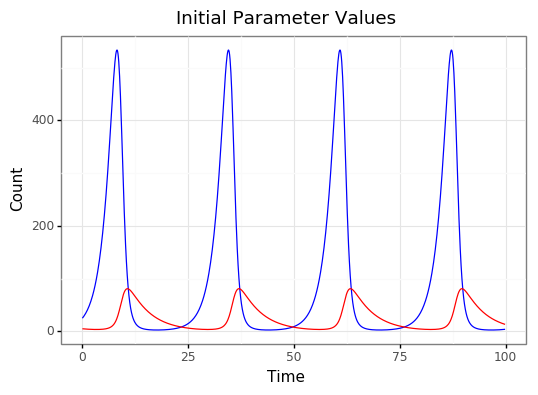

<ggplot: (284260689)>


In [1]:
#Import packages
import os
import numpy as np
import pandas as pd
import scipy
import scipy.integrate as spint
from plotnine import *

######################################################################
#Part 1 - Lotka Volterra Model
#Define a custom function for Lotka Volterra model
def LVSim(y,t0,b,a,e,s):
    #unpack state variables from list y
    H=y[0]
    P=y[1]
    #calculate changes in state variables
    dHdt=(b*H)-(a*P*H)
    dPdt=(e*a*P*H)-(s*P)
    #return lists containing changes in state variables with time
    return [dHdt,dPdt]

#Simulate model dynamics with one set of parameter values
##define initial values for state variables
H0=25; P0=5; N0=[H0,P0]
##define parameters
b=0.5; a=0.02; e=0.1; s=0.2
##put parameters in tuple
params=(b,a,e,s)
#define time steps
times=np.arange(0,100,0.1)
##simulate
modelSim=spint.odeint(func=LVSim,y0=N0,t=times,args=params)
##put output in a dataframe with time
modelSim=pd.DataFrame(data=modelSim)
modelSim['t']=times
modelSim.columns=["H", "P", "t"]

#Plot dynamics
LV_plot=ggplot(modelSim, aes(x="t"))+geom_line(aes(y="H"), color="blue")+geom_line(aes(y="P"), color="red")+theme_bw()+xlab("Time")+ylab("Count")+ggtitle("Initial Parameter Values")
print(LV_plot)

To understand the effect of these parameters further, we did a series of simulations in which we changed one paramter at a time and plotted the results. Here, we present the results of changing the "b" parameter. Prey (blue) and predator (red) dynamics are plotted against time, with the initial parameter value plotted as a solid line, a higher parameter value as a dashed line, and a lower parameter value as a dotted line. For additional plots of all other variables, see code at <https://github.com/brittnibertolet/Biocomputing_TeamAlphaWolf>.

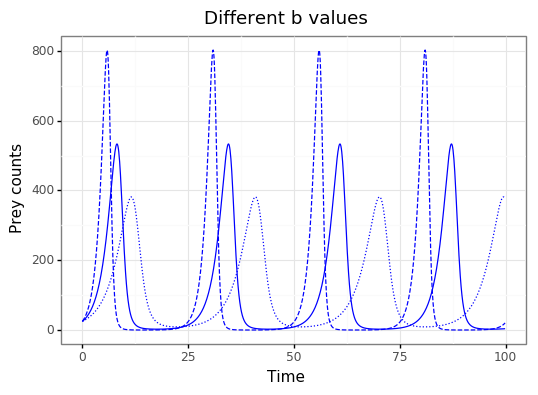

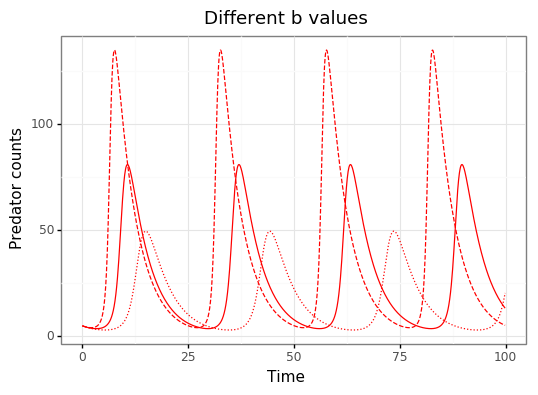

(<ggplot: (287771929)>, <ggplot: (287771945)>)


In [2]:
######################################################################
#Part 1 - Lotka Volterra Model
#Simulate model dynamics, changing one parameter at a time 
##define multiple to reduce/increase parameters
m=1.5
##make list of each parameter and whether or not it changes
b=[b,b/m,b*m,b,b,b,b,b,b]
a=[a,a,a,a/m,a*m,a,a,a,a]
e=[e,e,e,e,e,e/m,e*m,e,e]
s=[s,s,s,s,s,s,s,s/m,s*m]
##put lists into a data frame, rearrange order of columns, and make to list
parameters=pd.DataFrame({'b':b, 'a':a, 'e':e, 's':s})
parameters=parameters[['b','a','e','s']]
parameters=parameters.values.tolist()
##create seperate data frames for output of H and P for each iteration
modelH_Output=pd.DataFrame(columns=["t", "H", "bHlow", "bHhigh", "aHlow", "aHhigh", "eHlow", "eHhigh", "sHlow", "sHhigh"])
modelP_Output=pd.DataFrame(columns=["t", "P", "bPlow", "bPhigh", "aPlow", "aPhigh", "ePlow", "ePhigh", "sPlow", "sPhigh"])
##fill time values in first column
modelH_Output.t=times
modelP_Output.t=times

##simulate model dynamics using a for loop
for i in range(0,len(parameters)):
    #set paramters for the iteration
    params=parameters[i]
    #run siumulation with odeint
    modelSim=spint.odeint(func=LVSim,y0=N0,t=times,args=tuple(params))
    #convert output from array to data frame
    modelSim=pd.DataFrame(data=modelSim)
    #add results to model output data frame
    modelH_Output.iloc[:, i+1]=modelSim[0]
    modelP_Output.iloc[:, i+1]=modelSim[1]

##graph results manually from model output 
###plot of prey counts vs time, in which only paramter b is changing -- solid: initial b value, dotted: lower b value, dashed: higher b value
LVplot_Hb=ggplot(modelH_Output,aes(x="t"))+geom_line(aes(y="H"), color='blue')+geom_line(aes(y="bHlow"), color='blue', linetype='dotted')+geom_line(aes(y="bHhigh"), color='blue', linetype='dashed')+ggtitle("Different b values")+ylab("Prey counts")+xlab("Time")+theme_bw()
###plot of predator counts vs time, in which only paramter b is changing -- solid: initial b value, dotted: lower b value, dashed: higher b value
LVplot_Pb=ggplot(modelP_Output,aes(x="t"))+geom_line(aes(y="P"), color='red')+geom_line(aes(y="bPlow"), color='red', linetype='dotted')+geom_line(aes(y="bPhigh"), color='red', linetype='dashed')+ggtitle("Different b values")+ylab("Predator counts")+xlab("Time")+theme_bw()
###same as above, now only parameter a is changing
LVplot_Ha=ggplot(modelH_Output,aes(x="t"))+geom_line(aes(y="H"), color='blue')+geom_line(aes(y="aHlow"), color='blue', linetype='dotted')+geom_line(aes(y="aHhigh"), color='blue', linetype='dashed')+ggtitle("Different a values")+ylab("Prey counts")+xlab("Time")+theme_bw()
LVplot_Pa=ggplot(modelP_Output,aes(x="t"))+geom_line(aes(y="P"), color='red')+geom_line(aes(y="aPlow"), color='red', linetype='dotted')+geom_line(aes(y="aPhigh"), color='red', linetype='dashed')+ggtitle("Different a values")+ylab("Predator counts")+xlab("Time")+theme_bw()
###same as above, now only parameter e is changing
LVplot_He=ggplot(modelH_Output,aes(x="t"))+geom_line(aes(y="H"), color='blue')+geom_line(aes(y="eHlow"), color='blue', linetype='dotted')+geom_line(aes(y="eHhigh"), color='blue', linetype='dashed')+ggtitle("Different e values")+ylab("Prey counts")+xlab("Time")+theme_bw()
LVplot_Pe=ggplot(modelP_Output,aes(x="t"))+geom_line(aes(y="P"), color='red')+geom_line(aes(y="ePlow"), color='red', linetype='dotted')+geom_line(aes(y="ePhigh"), color='red', linetype='dashed')+ggtitle("Different e values")+ylab("Predator counts")+xlab("Time")+theme_bw()
###same as above, now only parameter s is changing
LVplot_Hs=ggplot(modelH_Output,aes(x="t"))+geom_line(aes(y="H"), color='blue')+geom_line(aes(y="sHlow"), color='blue', linetype='dotted')+geom_line(aes(y="sHhigh"), color='blue', linetype='dashed')+ggtitle("Different s values")+ylab("Prey counts")+xlab("Time")+theme_bw()
LVplot_Ps=ggplot(modelP_Output,aes(x="t"))+geom_line(aes(y="P"), color='red')+geom_line(aes(y="sPlow"), color='red', linetype='dotted')+geom_line(aes(y="sPhigh"), color='red', linetype='dashed')+ggtitle("Different s values")+ylab("Predator counts")+xlab("Time")+theme_bw()

#print graphs changing parameter b
print(LVplot_Hb, LVplot_Pb) 

### What can you say about the "role" of each parameter?

- ***Prey birth rate (b)*** is positively related to the maximum density of both predator and prey populations. Increasing b results in higher maximum density for both H and P. Increasing b also increases how fast the population reaches maximum density. 
 
- ***Predator attack rate (a)*** is negatively related to the maximum density of both predator and prey populations. Increasing a results in lower maximum density for both H and P. 
 
- ***Conversion efficiency of prey to predators (e)*** is negatively related to maximum density of prey, but affects predator density only minorly. Increasing e results in a much lower maximum density for H, but only a slightly lower value for P.
 
- ***Predator death rate (s)*** is positively related to maximum density of both predator and prey populations. Increasing s results in higher maximum density for both H and P. Increasing s also reduces the cycle length. 

### What can you say about the role of predators in the simulation?

Predators act as a regulator of prey density and dynamics, but are also affected by the abundance of prey. When prey birth rates increase, the maximum number of predators that can be supported increases. However, the model is particularly sensitive to changes in predator death rate. Increases in death rate result in both a change in maximum density and cycle length. 

### What is the relationship between parameter values and the predator-prey cycle length?

Increases in prey birth rate (b) and predator attach rate (a) result in shorter cycle lengths. The conversion efficiency of prey to predator (e) did not change cycle length. The predator death rate (s) strongly affected cycle length. Higher s resulted in shorter cycle lengths, and lower s resulted in longer cycle lengths.



## Rosenzweig-MacArthur Model

The Rosenzweig-MacArthur Model expands upon the Lotka-Volterra Model by adding two additional parameters to account for the effect of self-limitation of the predator population and the effect of a saturating functional response between predators and prey density. Each population (H = prey, P = predator) is described with a single differential equation, where b = prey birth rate, α = intraspecific competition coefficient, w = predator attack rate, d = satuation effect, e = conversion efficiency of prey to predators, s = predator death rate:

$dH/dt = bH(1-αH)-wPH/(d+H)$

$dP/dt = ewPH/(d+H) - sP$

![Conceptual Diagram of Rosenzweig-MacArthur Model](conceptualModels/RM_conceptualmodel.png)


### Understanding population dynamics through time
First, we simulated the dynamics of this model with the following parameters and initial conditions: b = 0.8, e = 0.07, s = 0.2, w = 5,d = 400, α = 0.001, H0 = 500, P0 = 120.  Prey (blue) and predator (red) dynamics are plotted against time.

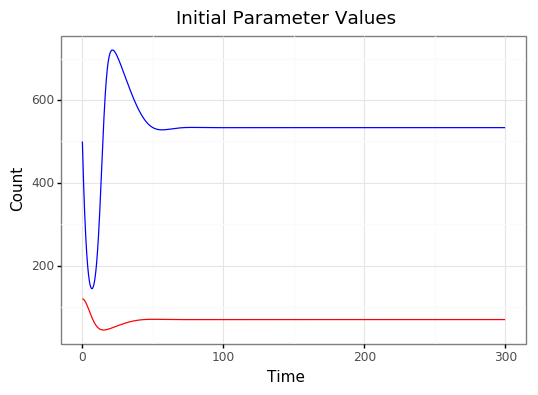

<ggplot: (287902689)>


In [3]:
######################################################################
#Part 2 - Rosenzweig-MacArthur Model
#Define a custom function for Rosenzweig-MacArthur model
def RMSim(y,t0,b,a,e,s,d,w):
    #unpack state variables from list y
    H=y[0]
    P=y[1]
    #calculate changes in state variables
    dHdt=(b*H)*(1-a*H)-(w*P)*(H/(d+H))
    dPdt=(e*w*P)*(H/(d+H))-s*P
    #return lists containing changes in state variables with time
    return [dHdt,dPdt]

#Simulate model dynamics with one set of parameter values
##define initial values for state variables
H0=500; P0=120; N0=[H0,P0]
##define parameters
b=0.8; a=0.001; e=0.07; s=0.2; d=400; w=5
##put parameters in tuple
params=(b,a,e,s,d,w)
##define time steps
times=np.arange(0,300,0.1)
##simulate
modelSim=spint.odeint(func=RMSim,y0=N0,t=times,args=params)
##put output in a dataframe with time
modelSim=pd.DataFrame(data=modelSim)
modelSim['t']=times
modelSim.columns=["H", "P", "t"]

#Plot dynamics
RM_plot=ggplot(modelSim, aes(x="t"))+geom_line(aes(y="H"), color="blue")+geom_line(aes(y="P"), color="red")+theme_bw()+xlab("Time")+ylab("Count")+ggtitle("Initial Parameter Values")
print(RM_plot)

To understand the effect of these parameters further, we did a series of simulations, as described above. Here, we present the results of changing the "s" parameter. Prey (blue) and predator (red) dynamics are plotted against time, with the initial parameter value plotted as a solid line, a higher parameter value as a dashed line, and a lower parameter value as a dotted line. For additional plots of all other variables, see code at <https://github.com/brittnibertolet/Biocomputing_TeamAlphaWolf>.

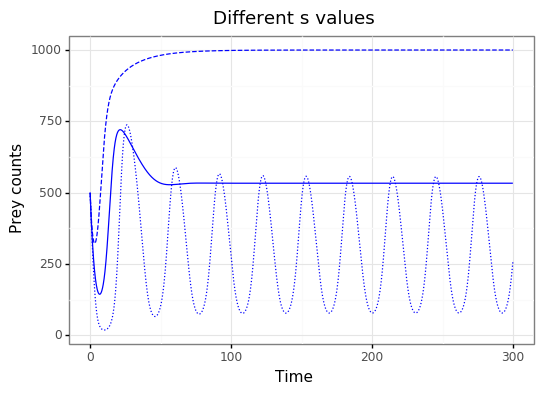

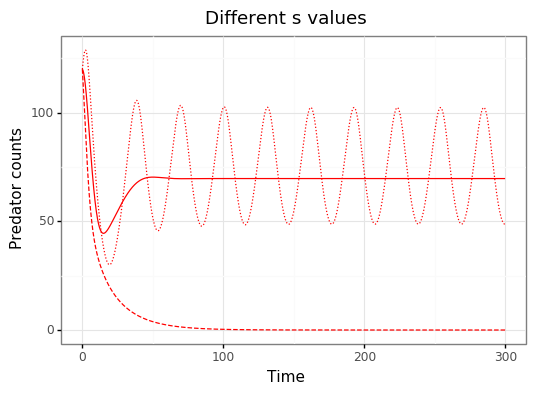

(<ggplot: (288281341)>, <ggplot: (288286325)>)


In [4]:
######################################################################
#Part 2 - Rosenzweig-MacArthur Model
#Simulate model dynamics, changing one parameter at a time 
##define multiple to reduce/increase parameters
m=1.5
##make list of each parameter and whether or not it changes
b=[b,b/m,b*m,b,b,b,b,b,b,b,b,b,b]
a=[a,a,a,a/m,a*m,a,a,a,a,a,a,a,a]
e=[e,e,e,e,e,e/m,e*m,e,e,e,e,e,e]
s=[s,s,s,s,s,s,s,s/m,s*m,s,s,s,s]
d=[d,d,d,d,d,d,d,d,d,d/m,d*m,d,d]
w=[w,w,w,w,w,w,w,w,w,w,w,w/m,w*m]
##put lists into a data frame
parameters=pd.DataFrame({'b':b, 'a':a, 'e':e, 's':s, 'd':d, 'w':w})
##rearrange order of columns
parameters=parameters[['b','a','e','s','d','w']]
##make into a list
parameters=parameters.values.tolist()
##create seperate data frames for output of H and P for each iteration
modelH_Output=pd.DataFrame(columns=["t", "H", "bHlow", "bHhigh", "aHlow", "aHhigh", "eHlow", "eHhigh", "sHlow", "sHhigh", "dHlow", "dHhigh", "wHlow", "wHhigh"])
modelP_Output=pd.DataFrame(columns=["t", "P", "bPlow", "bPhigh", "aPlow", "aPhigh", "ePlow", "ePhigh", "sPlow", "sPhigh", "dPlow", "dPhigh", "wPlow", "wPhigh"])
##fill time values in first column
modelH_Output.t=times
modelP_Output.t=times
##simulate model dynamics using a for loop
for i in range(0,len(parameters)):
    #set paramters for the iteration
    params=parameters[i]
    #run siumulation with odeint
    modelSim=spint.odeint(func=RMSim,y0=N0,t=times,args=tuple(params))
    #convert output from array to data frame
    modelSim=pd.DataFrame(data=modelSim)
    #add results to model output data frame
    modelH_Output.iloc[:, i+1]=modelSim[0]
    modelP_Output.iloc[:, i+1]=modelSim[1]

#Graph results manually from model output 
###plot of prey counts vs time, in which only paramter b is changing -- solid: initial b value, dotted: lower b value, dashed: higher b value
RMplot_Hb=ggplot(modelH_Output,aes(x="t"))+geom_line(aes(y="H"), color='blue')+geom_line(aes(y="bHlow"), color='blue', linetype='dotted')+geom_line(aes(y="bHhigh"), color='blue', linetype='dashed')+ggtitle("Different b values")+ylab("Prey counts")+xlab("Time")+theme_bw()
###plot of predator counts vs time, in which only paramter b is changing -- solid: initial b value, dotted: lower b value, dashed: higher b value
RMplot_Pb=ggplot(modelP_Output,aes(x="t"))+geom_line(aes(y="P"), color='red')+geom_line(aes(y="bPlow"), color='red', linetype='dotted')+geom_line(aes(y="bPhigh"), color='red', linetype='dashed')+ggtitle("Different b values")+ylab("Predator counts")+xlab("Time")+theme_bw()
###same as above, now only parameter a is changing
RMplot_Ha=ggplot(modelH_Output,aes(x="t"))+geom_line(aes(y="H"), color='blue')+geom_line(aes(y="aHlow"), color='blue', linetype='dotted')+geom_line(aes(y="aHhigh"), color='blue', linetype='dashed')+ggtitle("Different a values")+ylab("Prey counts")+xlab("Time")+theme_bw()
RMplot_Pa=ggplot(modelP_Output,aes(x="t"))+geom_line(aes(y="P"), color='red')+geom_line(aes(y="aPlow"), color='red', linetype='dotted')+geom_line(aes(y="aPhigh"), color='red', linetype='dashed')+ggtitle("Different a values")+ylab("Predator counts")+xlab("Time")+theme_bw()
###same as above, now only parameter e is changing
RMplot_He=ggplot(modelH_Output,aes(x="t"))+geom_line(aes(y="H"), color='blue')+geom_line(aes(y="eHlow"), color='blue', linetype='dotted')+geom_line(aes(y="eHhigh"), color='blue', linetype='dashed')+ggtitle("Different e values")+ylab("Prey counts")+xlab("Time")+theme_bw()
RMplot_Pe=ggplot(modelP_Output,aes(x="t"))+geom_line(aes(y="P"), color='red')+geom_line(aes(y="ePlow"), color='red', linetype='dotted')+geom_line(aes(y="ePhigh"), color='red', linetype='dashed')+ggtitle("Different e values")+ylab("Predator counts")+xlab("Time")+theme_bw()
###same as above, now only parameter s is changing
RMplot_Hs=ggplot(modelH_Output,aes(x="t"))+geom_line(aes(y="H"), color='blue')+geom_line(aes(y="sHlow"), color='blue', linetype='dotted')+geom_line(aes(y="sHhigh"), color='blue', linetype='dashed')+ggtitle("Different s values")+ylab("Prey counts")+xlab("Time")+theme_bw()
RMplot_Ps=ggplot(modelP_Output,aes(x="t"))+geom_line(aes(y="P"), color='red')+geom_line(aes(y="sPlow"), color='red', linetype='dotted')+geom_line(aes(y="sPhigh"), color='red', linetype='dashed')+ggtitle("Different s values")+ylab("Predator counts")+xlab("Time")+theme_bw()
###same as above, now only parameter d is changing
RMplot_Hd=ggplot(modelH_Output,aes(x="t"))+geom_line(aes(y="H"), color='blue')+geom_line(aes(y="dHlow"), color='blue', linetype='dotted')+geom_line(aes(y="dHhigh"), color='blue', linetype='dashed')+ggtitle("Different d values")+ylab("Prey counts")+xlab("Time")+theme_bw()
RMplot_Pd=ggplot(modelP_Output,aes(x="t"))+geom_line(aes(y="P"), color='red')+geom_line(aes(y="dPlow"), color='red', linetype='dotted')+geom_line(aes(y="dPhigh"), color='red', linetype='dashed')+ggtitle("Different d values")+ylab("Predator counts")+xlab("Time")+theme_bw()
###same as above, now only parameter w is changing
RMplot_Hw=ggplot(modelH_Output,aes(x="t"))+geom_line(aes(y="H"), color='blue')+geom_line(aes(y="wHlow"), color='blue', linetype='dotted')+geom_line(aes(y="wHhigh"), color='blue', linetype='dashed')+ggtitle("Different w values")+ylab("Prey counts")+xlab("Time")+theme_bw()
RMplot_Pw=ggplot(modelP_Output,aes(x="t"))+geom_line(aes(y="P"), color='red')+geom_line(aes(y="wPlow"), color='red', linetype='dotted')+geom_line(aes(y="wPhigh"), color='red', linetype='dashed')+ggtitle("Different w values")+ylab("Predator counts")+xlab("Time")+theme_bw()

###print results of b analysis
print(RMplot_Hs, RMplot_Ps)

### How do the dynamics differ from Lotka-Volterra?

The Lotka-Volterra model describes predator-prey interactions as cyclical. A low population of predators leads to a spike of prey populations. In response to this spike, the predator population spikes, although not at the same magnitude, because of the availability of prey. Due to the large number of predators, the prey population falls quickly which subsequently leads to the predator population dropping in the absence of resources. The loss of predators triggers the cycle again. The Rosenzweig-McArthur, however, describes population dynamics as a stabilization of both predator and prey populations. Early, predator and prey populations may experience drops and spikes, but eventually both populations stabilize around a relatively constant abundance. Both populations stay at this constant abundance unless something perturbs the dynamics.

### What can you say about the “role” of each parameter, especially what causes the dyamics to differ between the L-V and R-M models?

- ***Prey birth rate (b)*** is related to how quickly the populations reach a stable density. It does not change the density of prey at equilibrium, but does change the maximum and minimum density of prey. It also strongly affects the number of predators at equilibrium. Increasing b results in higher density of predators at equilibrium.

- ***Intraspecific competition coefficient (α)*** is related to the stability of the populations. Decreasing α destabilizes both populations and leads to cycles. Increasing α stabilizes the populations and decreases the height of the first cycle.

- ***Predator attack rate (w)*** is related to the stability of the populations. At high values of w, the dynamics become cyclical. 
 
- ***Satuation effect (d)*** is related to the stability of the populations. At lower values of e, the dynamics become cyclical.

- ***Conversion efficiency of prey to predators (e)*** is related to the stability of the populations. At high values of e, the dynamics become cyclical. 
 
- ***Predator death rate (s)*** is related to the stability of the populations. At lower values of e, the dynamics become cyclical. 

### What is the relationship between parameter values and predator abundance?

- ***Prey birth rate (b):*** All values result in an initial drop of predator abundance followed by an increase which eventually plateaus. Increasing b values causes the drop to become less severe and the plateau to be at a higher value of predator abundance.

- ***Predator attack rate (w):*** Decreasing w causes predator abundance to decrease over time to zero. Increasing w causes predator abundance to become cyclical.

- ***Intraspecific competition coefficient (α):*** Increasing α causes predator abundance to decrease over time to zero. Decreasing α increases predator abundance and also decreases stability (causes cycles). 

- ***Satuation effect (d):*** Increaing d causes predator abundance at equilibrium to decrease. Decreasing d also cause predator abundance to decrease, but not to the same extent. Decreasing d also causes instability (cycles).

- ***Conversion efficiency of prey to predators (e):*** Decreasing e causes predator abundance to drop tozero. Increasing increases predator abundance and also decreases stability (causes cycles). 

- ***Predator death rate (s):*** Increasing s causes predator abundance to drop to near zero. Decreasing s increases predator abundance and also decreases stability (causes cycles).

## Paradox of Enrichment

The Paradox of Enrichment is a phenomenon observed in the Rosenzweig-MacArthur Model where there is an inverse relationship between the carrying capacity of the prey (α) and the population stability of the predator. In theory, increasing the availability of the prey should decrease the predator density and increase the overall stability of the predator population. Below is a graph of the predator population over time with varying prey carrying capacities (α=0.00125 to α=0.0005), where the darkness of the line represents a higher carrying capacity (lower α).

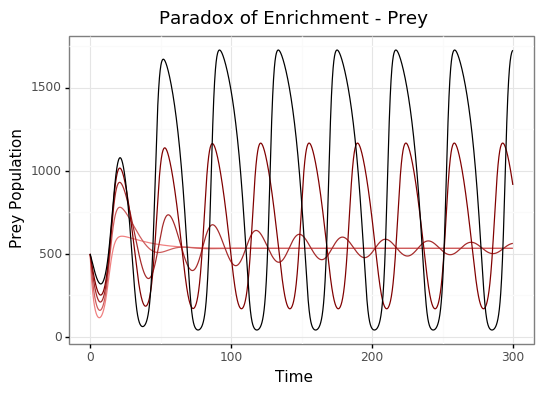

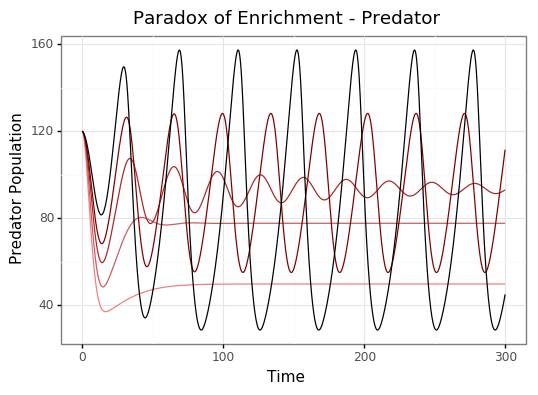

(<ggplot: (287893833)>, <ggplot: (288305693)>)


In [5]:
######################################################################
#Part 3 - Paradox of Enrichment
#Simulate model dynamics, changing the carrying capacity (alpha)
##define initial values for state variables
H0=500; P0=120; N0=[H0,P0]
##define time steps
times=np.arange(0,300,0.1)
##define parameters
b=0.8
e=0.07
s=0.2
d=400
w=5
a=[0.00125, .0009, .0007, .0006, .0005]
##make lists to data frame
parameters=pd.DataFrame({'b':b, 'a':a, 'e':e, 's':s, 'd':d, 'w':w})
##rearrange order of columns
parameters=parameters[['b','a','e','s','d','w']]
##make to list
parameters=parameters.values.tolist()
##create seperate data frames for output of H and P for each iteration
modelH_Output=pd.DataFrame(columns=["t", "H1", "H2", "H3", "H4", "H5"])
modelP_Output=pd.DataFrame(columns=["t", "P1", "P2", "P3", "P4", "P5"])
##fill time values in first column
modelH_Output.t=times
modelP_Output.t=times
##simulate model dynamics using a for loop
for i in range(0,len(parameters)):
    #set paramters for the iteration
    params=parameters[i]
    #run siumulation with odeint
    modelSim=spint.odeint(func=RMSim,y0=N0,t=times,args=tuple(params))
    #convert output from array to data frame
    modelSim=pd.DataFrame(data=modelSim)
    #add results to model output data frame
    modelH_Output.iloc[:, i+1]=modelSim[0]
    modelP_Output.iloc[:, i+1]=modelSim[1]

#Plot the results
plot_PoE_P=ggplot(modelP_Output,aes(x="t"))+geom_line(aes(y="P1"), color='lightcoral')+geom_line(aes(y="P2"), color='indianred')+geom_line(aes(y="P3"), color='brown')+geom_line(aes(y="P4"), color='maroon')+geom_line(aes(y="P5"), color='black')+ggtitle("Paradox of Enrichment - Predator")+ylab("Predator Population")+xlab("Time")+theme_bw()
plot_PoE_H=ggplot(modelH_Output,aes(x="t"))+geom_line(aes(y="H1"), color='lightcoral')+geom_line(aes(y="H2"), color='indianred')+geom_line(aes(y="H3"), color='brown')+geom_line(aes(y="H4"), color='maroon')+geom_line(aes(y="H5"), color='black')+ggtitle("Paradox of Enrichment - Prey")+ylab("Prey Population")+xlab("Time")+theme_bw()

###print plots
print(plot_PoE_H, plot_PoE_P)

### What happens as carrying capacity increases?

As carry capacity of the prey increases, the populations become more cyclical and the magnitude of the peaks become greater. 

### Why do you think we see the Paradox of Enrichment?

The Paradox of Enrichment is observed because higher resource availability destabilizes prey populations and results in dramatic changes in prey populations. At high prey carrying capacity, predator density increases rapidly as prey availability drops. At a certain point, prey availability is severely limited when compared to predator population, and this results in a lack of resources for the predator. This causes predator population to plummet. The low predator density now allows for the prey population to increase rapidly and the cycle repeats itself. Therefore, at higher prey carrying capacities, predator populations are destabilized. 